In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

#### Train Data :

In [6]:
df_train = pd.read_csv('train.csv', nrows=200000, parse_dates=["pickup_datetime"])

### EDA :

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [11]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [13]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

#### Data Pre-Processing :

##### Minimum Fare-Amount is Negative, so we have to remove these obervations

In [19]:
df_train = df_train[df_train["fare_amount"] >= 0]

In [21]:
len(df_train)

199987

#### Histogram of fare amount :

In [24]:
sns.distplot(df_train[df_train["fare_amount"] < 100]["fare_amount"], kde=False)

C:\Users\soumy\AppData\Local\Temp\ipykernel_12004\493551355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train["fare_amount"] < 100]["fare_amount"], kde=False)


<Axes: xlabel='fare_amount'>

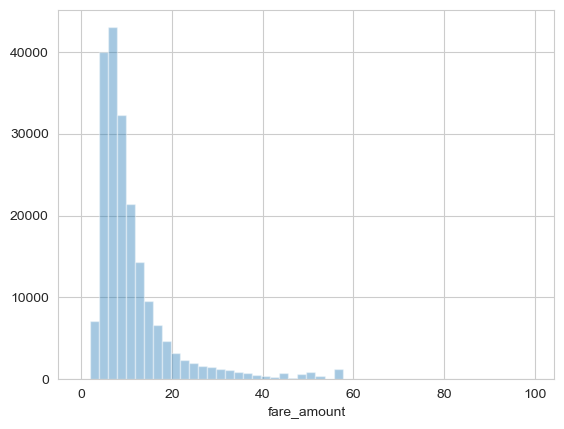

In [26]:
plt.show()

In [29]:
sns.distplot(df_train[df_train["fare_amount"] < 75]["fare_amount"], kde=False)

C:\Users\soumy\AppData\Local\Temp\ipykernel_12004\722503614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train["fare_amount"] < 75]["fare_amount"], kde=False)


<Axes: xlabel='fare_amount'>

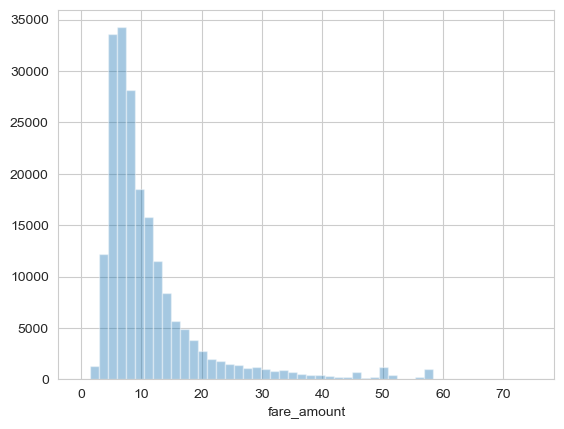

In [31]:
plt.show()

There are small spikes between 40 and 60

#### Removing Missing Data :

In [37]:
print(df_train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [39]:
df_train = df_train.dropna(how='any', axis='rows')

In [41]:
len(df_train)

199986

#### Test Data :

In [44]:
df_test = pd.read_csv('test.csv')

In [46]:
df_test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [48]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [54]:
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & 
            (df["pickup_longitude"] <= BB[1]) &
            (df["pickup_latitude"] >= BB[2]) &
            (df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) &
            (df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) &
            (df["dropoff_latitude"] <= BB[3]))

In [56]:
BB = (-74.3, -73.0, 40.6, 41.7)

In [60]:
df_train = df_train[select_within_boundingbox(df_train, BB)]

In [62]:
print("New size {}".format(len(df_train)))

New size 195612


#### Scatter Plot :

In [77]:
def plot_hires(df, BB, figsize=(12,12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

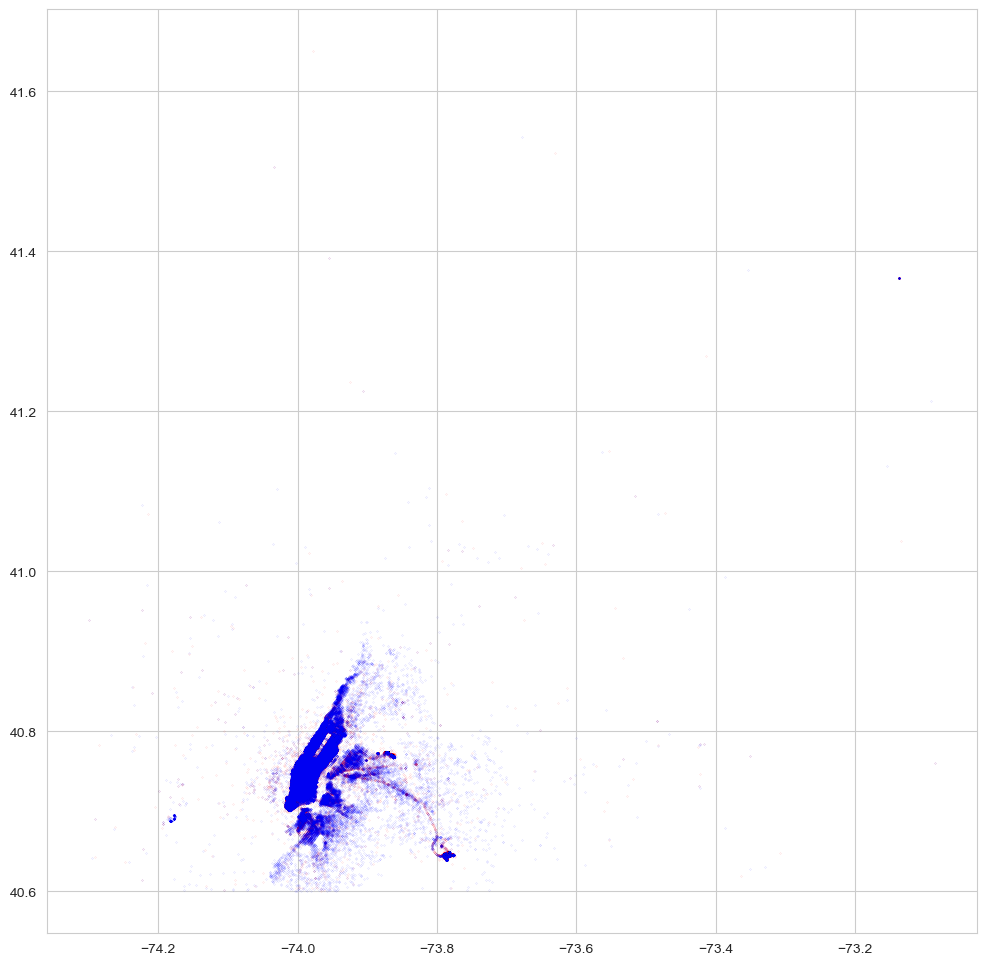

In [79]:
plot_hires(df_train, BB)
plt.show()

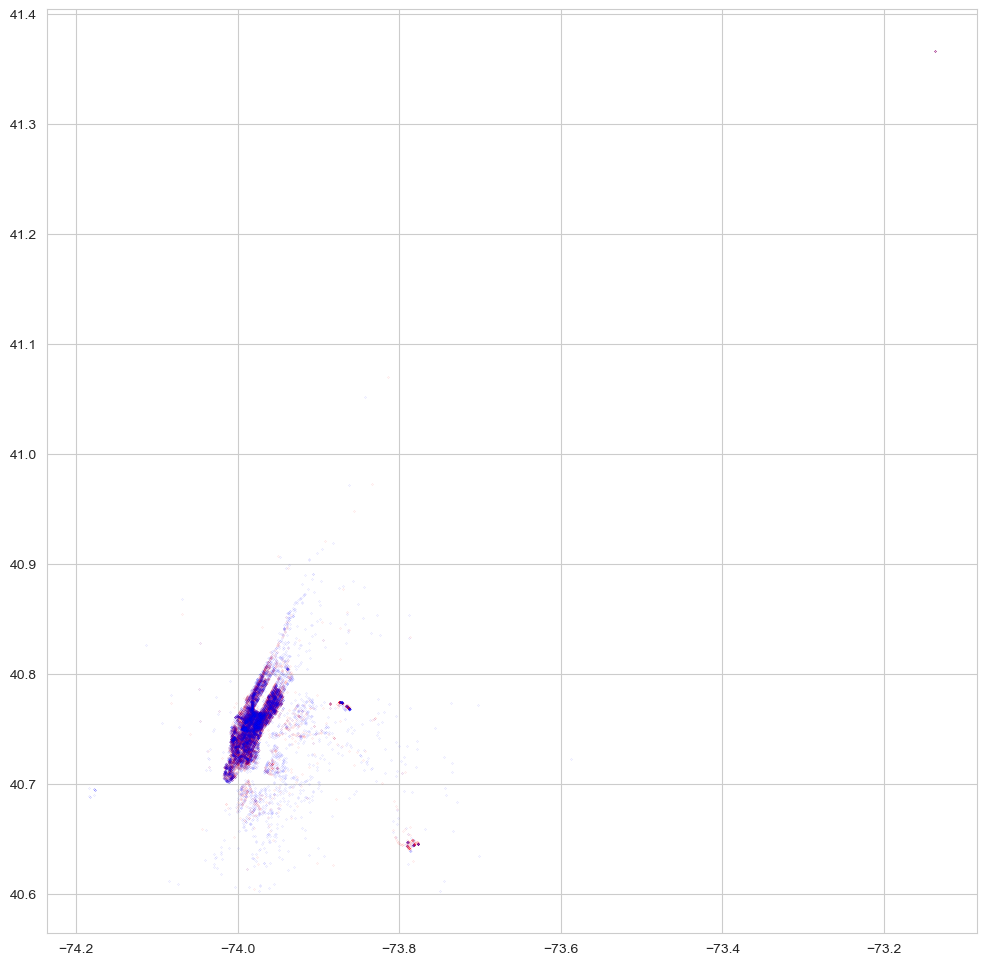

In [81]:
plot_hires(df_test, BB)
plt.show()

#### Distance and Time Visualization :
1. The longer the distance between pickup and dropoff locations, the higher the fare.
2. Some trips, like to/from an airport are fixed fee.
3. Fare at night is different from day time.

##### Calculating the distance between latitude and longitude :

In [100]:
def haversine_np (lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [108]:
df_train.loc[:, 'trip_distance'] = haversine_np(
    df_train['pickup_longitude'],
    df_train['pickup_latitude'],
    df_train['dropoff_longitude'],
    df_train['dropoff_latitude']
)

In [110]:
df_train.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,hour,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,2009,6,15,0,17,1.030117
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,2010,1,5,1,16,8.444828


In [114]:
df_train["trip_distance"].hist(bins=50, figsize=(12,4))
plt.title("Histogram trip distance in Kms");

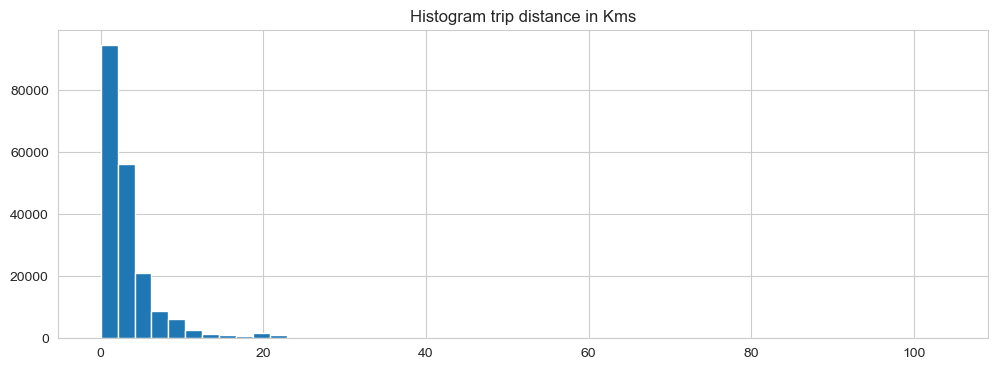

In [116]:
plt.show()

In [118]:
df_train["trip_distance"].describe()

count    195612.000000
mean          3.318651
std           3.782814
min           0.000000
25%           1.255175
50%           2.151722
75%           3.897518
max         103.969647
Name: trip_distance, dtype: float64

##### It seems most rides are just short rides, with a small peak at ~20kms. This peak could be due to airport drives.

In [123]:
df_train = df_train.copy()

In [125]:
df_train.groupby('passenger_count')[['trip_distance', 'fare_amount']].mean()

,trip_distance,fare_amount
passenger_count,,
0,2.953369,9.080659
1,3.273162,11.169553
2,3.496573,11.786048
3,3.330649,11.332867
4,3.420403,11.680824
5,3.323012,11.172870
6,3.488176,12.354238


#### Scatter Plot distance vs Fare :

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].scatter(df_train["trip_distance"], df_train["fare_amount"], alpha=0.2)
axs[0].set_xlabel("trip_distance_km")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")
# Zooming-in some part of the data
idx = ((df_train['trip_distance'] < 23) & (df_train["fare_amount"] < 100))
axs[1].scatter(df_train[idx]["trip_distance"], df_train[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("trip_distance_km")
axs[1].set_ylabel("fare $USD")
axs[1].set_title("Zoom in an distance < 23 Kms and fare < $100")
                        

Text(0.5, 1.0, 'Zoom in an distance < 23 Kms and fare < $100')

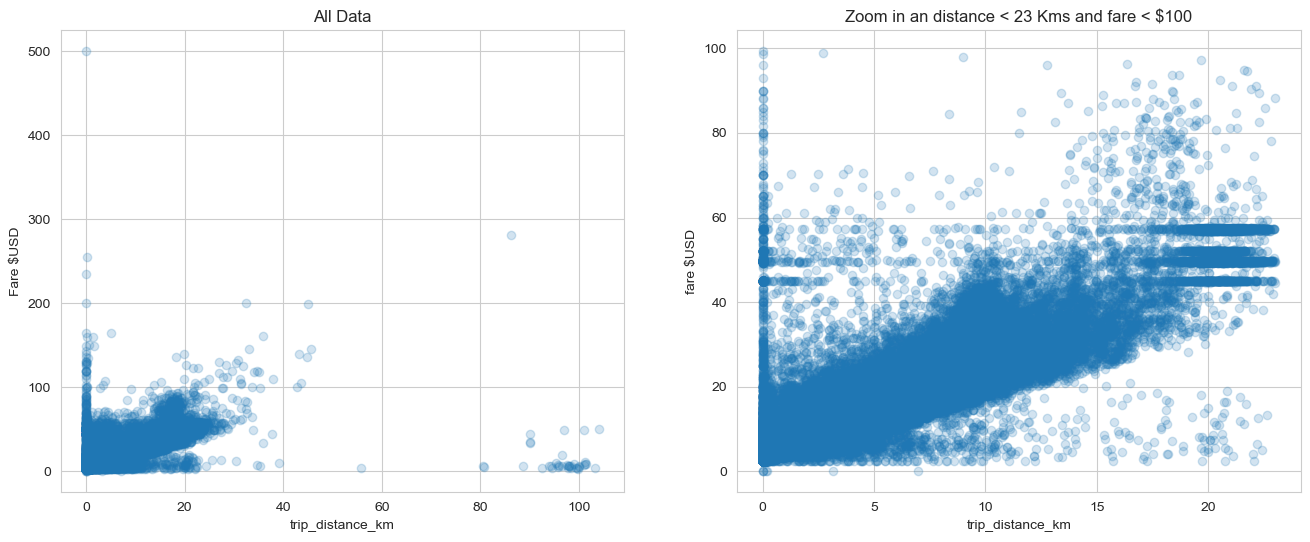

In [133]:
plt.show()

#### Few Observations :
1. There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.
2. There are some trips with >50 miles travel distance but low fare. Perhaps these are discounted trips.
3. The horizontal lines in the right plot might indicate again the fixed fare trips to/from JFK airport. Overall there seems to be a(linear) relation between distance and fare with an avg. rate of +/-100/35 = 2.857$USD/km

In [143]:
# removing datapoints with distance <0.08 kms 
idx = (df_train["trip_distance"] >= 0.08046)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 192445
New size: 192445


In [145]:
jfk = (-73.7822222222, 40.6441666667)
nyc = (-74.0063889, 40.7141667)

In [175]:
def plot_location_fare(loc, name, range=2.41):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    idx = (haversine_np(df_train["pickup_latitude"], df_train["pickup_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins=100, ax=axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} kms of {}".format(range, name))
    idx = (haversine_np(df_train["dropoff_latitude"], df_train["dropoff_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins=100, ax=axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} kms of {}".format(range, name))

In [177]:
plot_location_fare(jfk, 'JFK Airport')

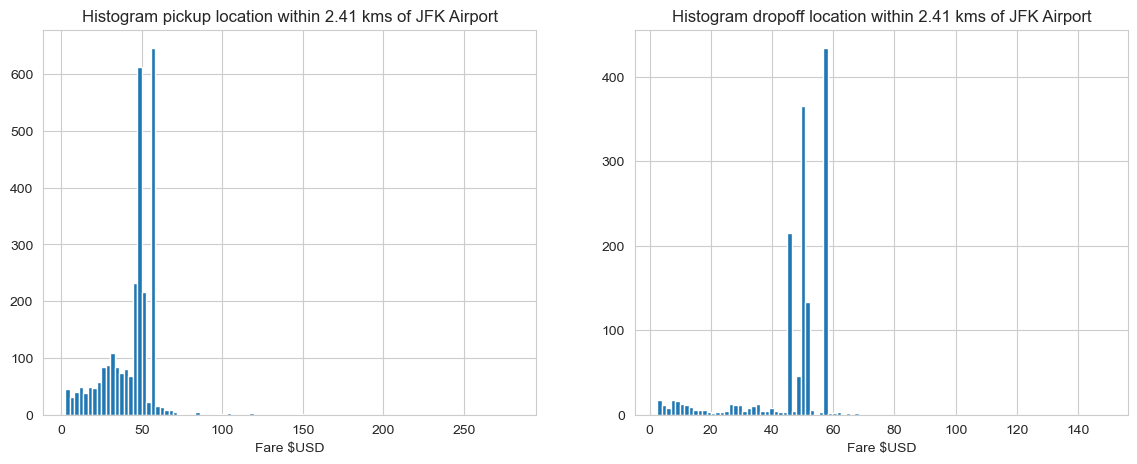

In [178]:
plt.show()

In [181]:
ewr = (-74.175, 40.69)  #Newark Liberty Int. Airport
lgr = (-73.87, 40.77)   #Laguardia Airport

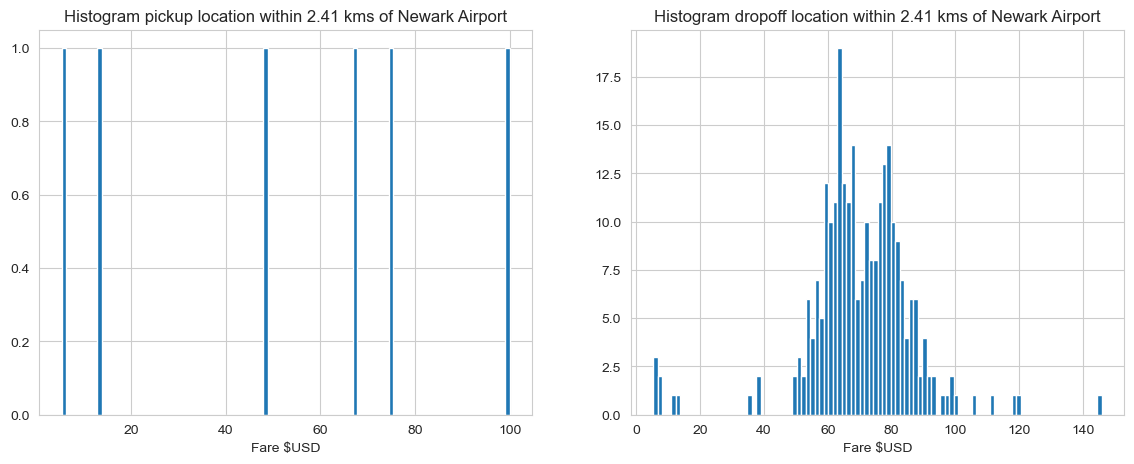

In [185]:
plot_location_fare(ewr, 'Newark Airport')
plt.show()

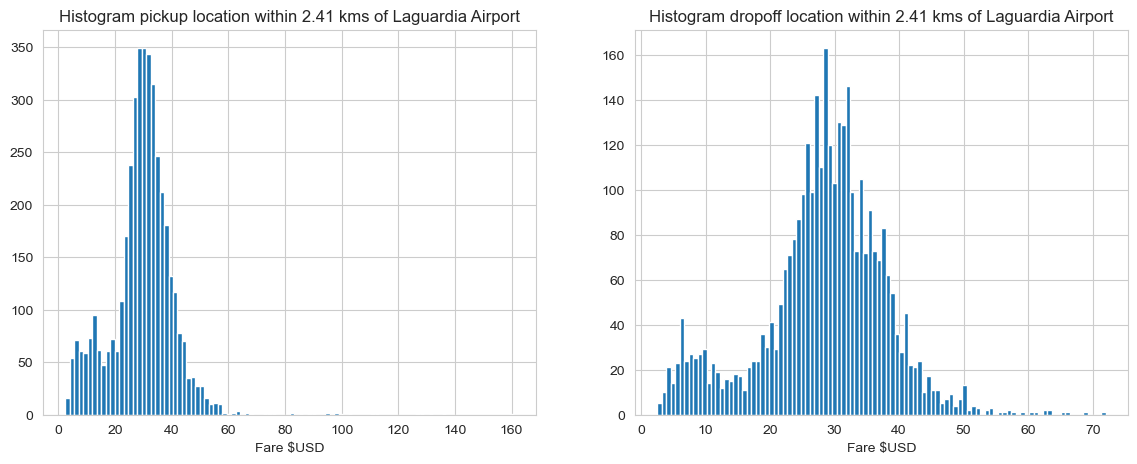

In [187]:
plot_location_fare(lgr, 'Laguardia Airport')
plt.show()

In [189]:
df_train["fare_per_km"] = df_train["fare_amount"] / df_train["trip_distance"]

In [191]:
df_train["fare_per_km"].describe()

count    192445.000000
mean          4.603678
std           9.896891
min           0.000000
25%           2.966513
50%           3.815963
75%           5.019315
max        2370.510454
Name: fare_per_km, dtype: float64

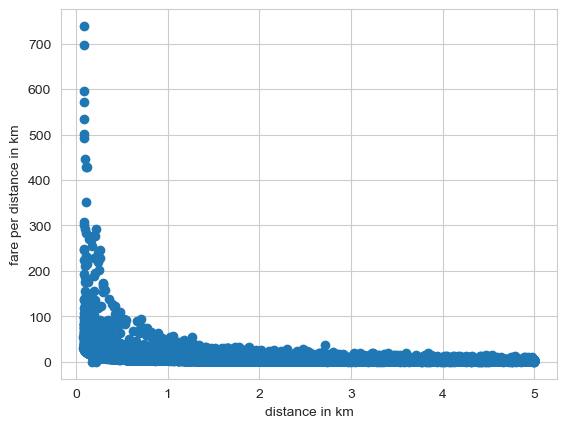

In [195]:
idx = (df_train["trip_distance"] < 5) & (df_train["fare_amount"] < 100)
plt.scatter(df_train[idx]["trip_distance"], df_train[idx]["fare_per_km"])
plt.xlabel("distance in km")
plt.ylabel("fare per distance in km")
plt.show()

In [197]:
df_train['year'] = df_train["pickup_datetime"].apply(lambda t: t.year)
df_train['weekday'] = df_train["pickup_datetime"].apply(lambda t: t.weekday())
df_train['hour'] = df_train["pickup_datetime"].apply(lambda t: t.hour)

#### Pivot Table :

In [200]:
df_train.pivot_table("fare_per_km", index="hour", columns="year")

year,2009,2010,2011,2012,2013,2014,2015
hour,,,,,,,
0,3.797401,4.641068,3.774896,4.022482,4.274521,4.255976,4.440973
1,3.856274,4.223927,3.709554,4.215446,4.244457,4.158199,4.140741
2,4.696053,3.877277,3.765943,4.235008,4.191836,4.211285,4.411588
3,3.678593,4.039708,3.614343,3.905267,6.629326,4.339872,4.507836
4,3.664009,4.347117,3.507587,4.388334,3.812437,4.017970,4.129313
5,3.390808,3.729936,3.512803,3.989449,3.703090,4.238504,4.083003
6,3.764361,3.877123,3.975164,3.607901,3.934105,3.848217,3.834918
7,4.135903,4.065522,4.017605,4.051642,4.472174,4.523714,4.750236
8,4.472363,4.703106,4.743795,4.794598,5.300869,5.620840,5.097717


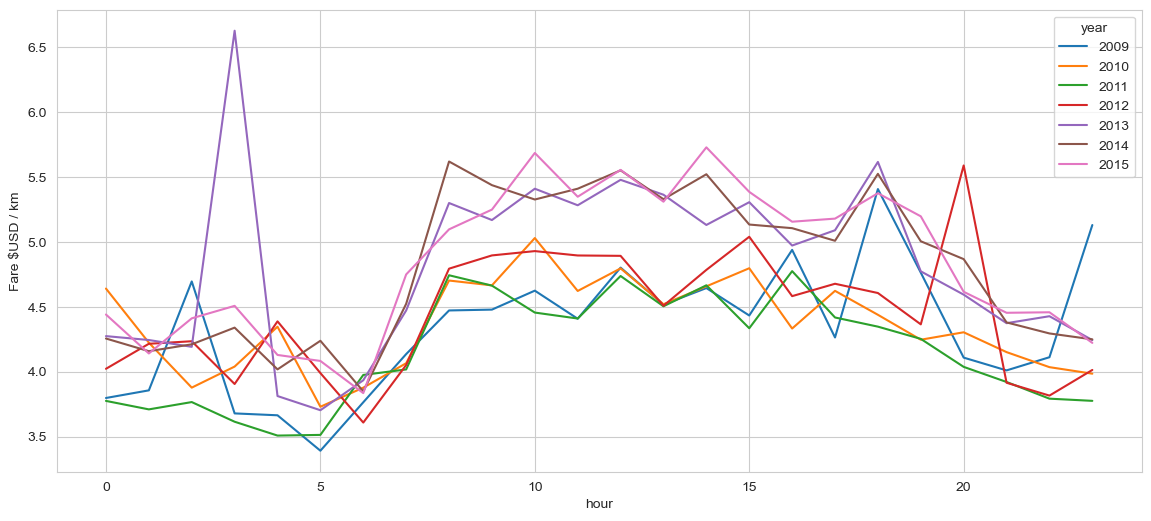

In [204]:
df_train.pivot_table("fare_per_km", index="hour", columns="year").plot(figsize=(14,6))
plt.ylabel("Fare $USD / km")
plt.show()             